# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [3]:
print(X.shape, type(X))
print(y.shape, type(y))

print(X.head())
print(y.head())

(6497, 11) <class 'pandas.core.frame.DataFrame'>
(6497, 1) <class 'pandas.core.frame.DataFrame'>
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51     

# Preprocessing

## Add bias term

In [4]:
X['bias'] = np.ones(X.shape[0])
print(X.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  bias  
0      9.4   1.0  
1      9.8   1.0  
2      9.8   1.0  
3      9.8

/tmp/ipykernel_4500/1110144674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bias'] = np.ones(X.shape[0])


# Solving

## Using Direct Formula

In [5]:
x = X.to_numpy()
y = y.to_numpy()
print(x.shape, type(x))

(6497, 12) <class 'numpy.ndarray'>


In [6]:
beta = np.linalg.inv(x.T @ x) @ x.T @ y
print(beta)

[[ 6.76839156e-02]
 [-1.32789221e+00]
 [-1.09656648e-01]
 [ 4.35587508e-02]
 [-4.83713540e-01]
 [ 5.96988830e-03]
 [-2.48129841e-03]
 [-5.49669423e+01]
 [ 4.39296072e-01]
 [ 7.68251760e-01]
 [ 2.67030009e-01]
 [ 5.57627497e+01]]


In [7]:
y_predict = x @ beta
e = y_predict - y
mse = np.mean(e**2)
print(f"mse: {mse}")

mse: 0.53971546727767


In [8]:
r2 = 1 - np.sum(e**2) / np.sum((y - np.mean(y))**2)
print(f"R^2: {r2}")

R^2: 0.2921368850410796


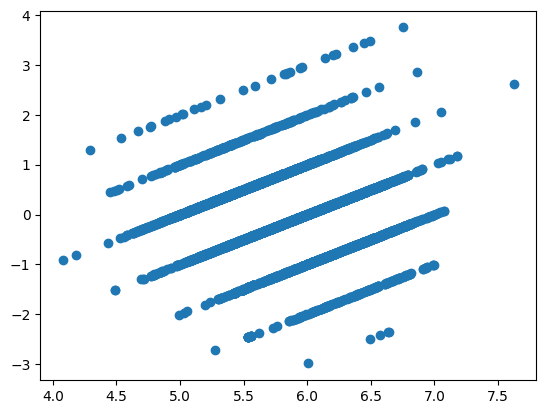

In [9]:
# Residual(e) vs fit(y) plot
plt.scatter(y_predict, e)
plt.show()

# Using Gradient Descent

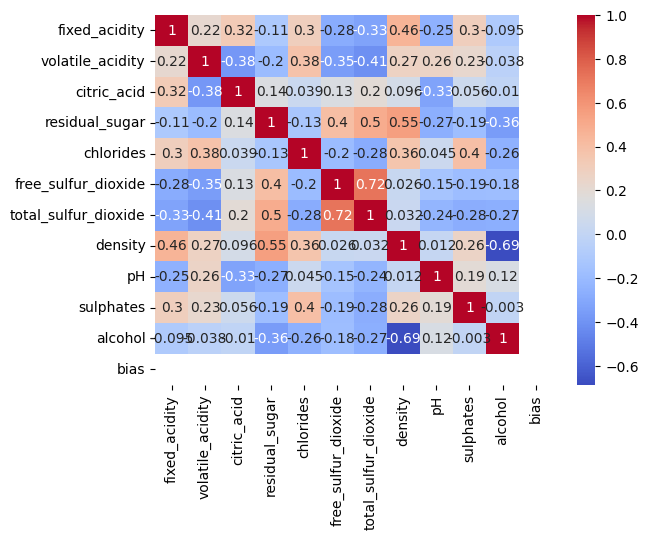

In [10]:
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.show()

In [11]:
def GD(x, y, step_size=0.01, n_iter=1000):
  m = x.shape[0]
  n = x.shape[1]

  beta = np.zeros(n)
  beta = beta.reshape(n, 1)
  print(beta.shape)

  loss_history = np.zeros(n_iter)

  for i in tqdm(range(n_iter)):
    y_predict = x @ beta
    e = y_predict - y
    mse = np.mean(e**2)

    beta = beta - step_size * (2/m) * (x.T @ e)
    loss_history[i] = mse

    # if i % 100 == 0:
    #   tqdm.write(f"Iteration: {i+1} mse: {mse}")

  print(f"Final mse: {mse}")
  print(f"Final beta: {beta.flatten()}")
  print(f"Final R^2: {1 - np.sum(e**2) / np.sum((y - np.mean(y))**2)}")
  
  return beta, loss_history

(12, 1)


  0%|          | 0/10000 [00:00<?, ?it/s]

/tmp/ipykernel_4500/1937397126.py:14: RuntimeWarning: overflow encountered in square
  mse = np.mean(e**2)
/home/rishikeshkumar/.local/lib/python3.13/site-packages/numpy/_core/_methods.py:135: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_4500/1937397126.py:16: RuntimeWarning: overflow encountered in matmul
  beta = beta - step_size * (2/m) * (x.T @ e)
/tmp/ipykernel_4500/1937397126.py:16: RuntimeWarning: invalid value encountered in matmul
  beta = beta - step_size * (2/m) * (x.T @ e)
/tmp/ipykernel_4500/1937397126.py:16: RuntimeWarning: invalid value encountered in subtract
  beta = beta - step_size * (2/m) * (x.T @ e)
100%|██████████| 10000/10000 [00:00<00:00, 13004.38it/s]


Final mse: nan
Final beta: [nan nan nan nan nan nan nan nan nan nan nan nan]
Final R^2: nan


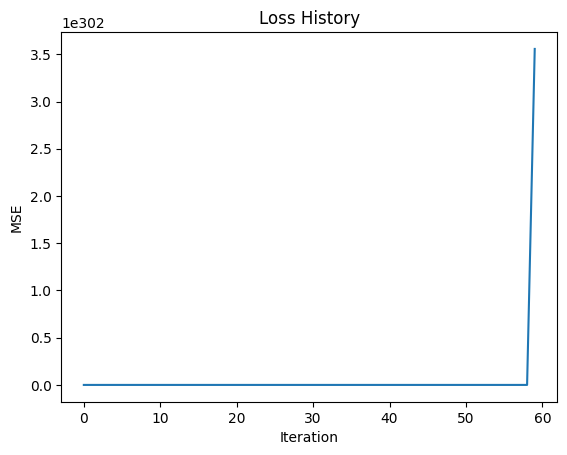

(12, 1)


100%|██████████| 10000/10000 [00:00<00:00, 12433.79it/s]


Final mse: nan
Final beta: [nan nan nan nan nan nan nan nan nan nan nan nan]
Final R^2: nan


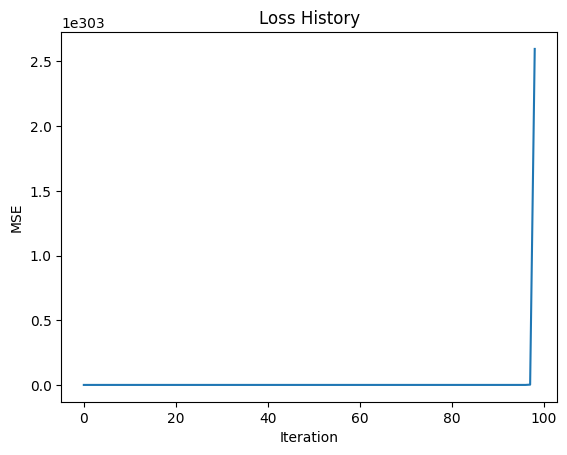

(12, 1)


100%|██████████| 10000/10000 [00:00<00:00, 12380.18it/s]


Final mse: nan
Final beta: [nan nan nan nan nan nan nan nan nan nan nan nan]
Final R^2: nan


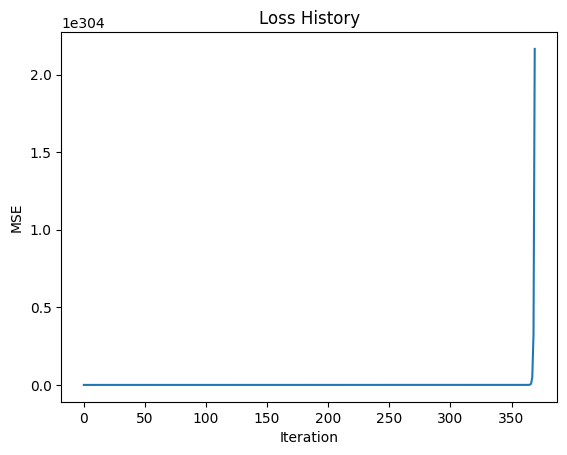

(12, 1)


100%|██████████| 10000/10000 [00:00<00:00, 13739.89it/s]


Final mse: 0.6390855752408713
Final beta: [1.83360721e-01 7.30558928e-03 7.06217387e-03 1.69402778e-02
 1.39968185e-03 9.19902695e-03 3.01793870e-04 2.90824301e-02
 9.85010379e-02 1.80314838e-02 3.51682147e-01 2.93457960e-02]
Final R^2: 0.1618081499551023


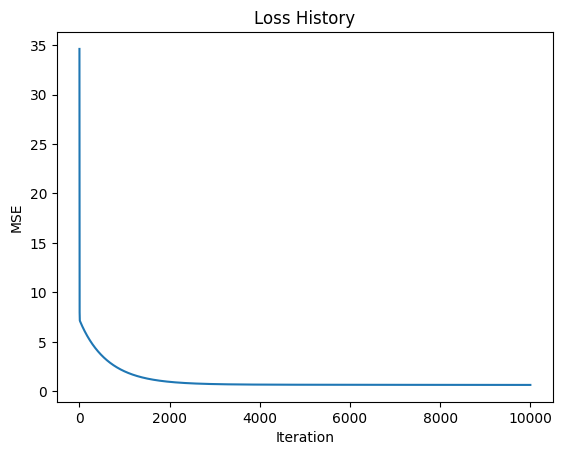

In [12]:
# y_predict = x @ beta
# e = y_predict = y
# print(e.shape)

for step_size in [0.01, 0.001, 0.0001, 1e-05]:
  beta, loss_history = GD(x, y, step_size=step_size, n_iter=10000)

  plt.plot(loss_history)
  plt.xlabel('Iteration')
  plt.ylabel('MSE')
  plt.title('Loss History')
  plt.show()

# Using SKLearn

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
model = LinearRegression()
model.fit(X, y)
y_predict = model.predict(X)
print(f"sklearn mse: {mean_squared_error(y, y_predict)}")
print(f"sklearn R^2: {r2_score(y, y_predict)}")

sklearn mse: 0.5397154672776702
sklearn R^2: 0.2921368850410794
